In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('SP 500 ESG Risk Ratings.csv')

In [ ]:
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [ ]:
data.shape

(503, 15)

In [ ]:
data.isna().sum()

Symbol                      0
Name                        0
Address                     2
Sector                      2
Industry                    2
Full Time Employees         7
Description                 2
Total ESG Risk score       70
Environment Risk Score     70
Governance Risk Score      70
Social Risk Score          70
Controversy Level         100
Controversy Score          70
ESG Risk Percentile        70
ESG Risk Level            127
dtype: int64

#**DATA PRE-PROCESSING**

In [ ]:
data = data.drop(columns=['Address', 'Symbol', 'Description','ESG Risk Percentile' ])

In [ ]:
data['Full Time Employees'] = data['Full Time Employees'].str.replace(',', '')

In [ ]:
data.head()

,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Level
0,Agilent Technologies Inc,Healthcare,Diagnostics & Research,18000,15.0,0.3,6.3,8.6,Low,1.0,Low
1,American Airlines Group Inc,Industrials,Airlines,132500,29.0,12.0,5.0,12.0,Moderate,2.0,NaN
2,Advance Auto Parts Inc,Consumer Cyclical,Specialty Retail,40000,12.0,0.0,3.0,8.0,Moderate,2.0,Negligible
3,Apple Inc,Technology,Consumer Electronics,164000,17.0,0.6,9.2,6.9,Significant,3.0,Low
4,Abbvie Inc,Healthcare,Drug Manufacturers—General,50000,28.0,1.1,9.9,16.8,Significant,3.0,Medium


In [ ]:
data.dropna(subset=['Industry'], inplace=True)
data

,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Level
0,Agilent Technologies Inc,Healthcare,Diagnostics & Research,18000,15.0,0.3,6.3,8.6,Low,1.0,Low
1,American Airlines Group Inc,Industrials,Airlines,132500,29.0,12.0,5.0,12.0,Moderate,2.0,NaN
2,Advance Auto Parts Inc,Consumer Cyclical,Specialty Retail,40000,12.0,0.0,3.0,8.0,Moderate,2.0,Negligible
3,Apple Inc,Technology,Consumer Electronics,164000,17.0,0.6,9.2,6.9,Significant,3.0,Low
4,Abbvie Inc,Healthcare,Drug Manufacturers—General,50000,28.0,1.1,9.9,16.8,Significant,3.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...
498,Yum Brands Inc,Consumer Cyclical,Restaurants,36000,21.0,4.5,4.4,11.6,Moderate,2.0,Medium
499,Zimmer Biomet Holdings Inc,Healthcare,Medical Devices,18000,27.0,4.0,8.0,15.0,Moderate,2.0,NaN
500,Zebra Technologies Corp Cl A,Technology,Communication Equipment,10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,Zions Bancorp Na,Financial Services,Banks—Regional,10103,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['Full Time Employees'] = pd.to_numeric(data['Full Time Employees'], errors='coerce')

In [ ]:
data['Full Time Employees'].mean().round()

57060.0

In [ ]:
data['Total ESG Risk score'].mean().round()

21.0

In [ ]:
data['Controversy Score'].mean().round()

2.0

In [ ]:
data['Social Risk Score'].mean().round()

9.0

In [ ]:
data['Environment Risk Score'].mean().round()

6.0

In [ ]:
data['Governance Risk Score'].mean().round()

7.0

In [ ]:
data['Full Time Employees'] = data['Full Time Employees'].fillna(57060)

In [ ]:
data['Total ESG Risk score'] = data['Total ESG Risk score'].fillna(21.0)

In [ ]:
data['Controversy Score'] = data['Controversy Score'].fillna(2.0)

In [ ]:
data['Social Risk Score'] = data['Social Risk Score'].fillna(9.0)

In [ ]:
data['Environment Risk Score'] = data['Controversy Score'].fillna(6.0)

In [ ]:
data['Governance Risk Score'] = data['Governance Risk Score'].fillna(7.0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data = data.apply(le.fit_transform)

In [ ]:
data

,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Level
0,10,6,28,188,7,1,31,57,1,1,1
1,26,7,3,356,21,2,18,89,2,2,5
2,6,2,99,263,4,2,0,51,2,2,3
3,41,9,25,363,9,3,59,40,4,3,1
4,2,6,30,283,20,3,66,123,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...
498,496,2,88,252,13,2,12,86,2,2,2
499,498,6,63,188,19,2,48,114,2,2,5
500,497,9,20,118,13,2,38,61,5,2,5
501,499,5,11,114,13,2,38,61,5,2,5


In [ ]:
data['ESG Risk Level'].mean().round()

3.0

In [ ]:
data['ESG Risk Level'].value_counts()

ESG Risk Level
2    134
1    131
5    126
3     58
0     34
4     18
Name: count, dtype: int64

In [ ]:
data['ESG Risk Level'] = data['ESG Risk Level'].replace(5,3)

In [ ]:
data['Sector'].mean().round()

6.0

In [ ]:
data['Sector'].value_counts()

Sector
9     75
7     70
6     67
5     67
2     58
3     36
8     31
10    30
1     23
0     22
4     22
Name: count, dtype: int64

In [ ]:
data['Sector'] = data['Sector'].replace(11,6)


In [ ]:
data['Controversy Level'].mean().round()

3.0

In [ ]:
data['Controversy Level'].value_counts()

Controversy Level
2    197
1    105
5     99
4     84
0     14
3      2
Name: count, dtype: int64

In [ ]:
data['Controversy Level'] = data['Controversy Level'].replace(6,3)


In [ ]:
data.isna().sum()

Name                      0
Sector                    0
Industry                  0
Full Time Employees       0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Level            0
dtype: int64

In [ ]:
data.shape

(501, 11)

**All NaN values have been processed by replacement, the unwanted columns have been dropped and label encoding has been applied. Thus, the data is suitable for further analysis now.**

#**LOGISTIC** **REGRESSION**

In [ ]:
X = data.drop(columns=['ESG Risk Level'])
Y = data['ESG Risk Level']

In [ ]:
np.unique(Y)

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((400, 10), (400,))

In [ ]:
X_test.shape, Y_test.shape

((101, 10), (101,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_train, Y_train)

0.62

In [ ]:
model.score(X_test, Y_test)

0.5643564356435643

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
X1 = data.drop(columns=['ESG Risk Level', 'Total ESG Risk score'])
Y1 = data['ESG Risk Level']

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X1_train, Y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model1.score(X1_train, Y1_train)

0.52

In [ ]:
model1.score(X1_test, Y1_test)

0.5148514851485149

In [ ]:
np.unique(data['Controversy Level'])

array([0, 1, 2, 3, 4, 5])

In [ ]:
x1 = data.drop(columns=['Controversy Level'])
y1 = data['Controversy Level']

In [ ]:
fraud = LogisticRegression()

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

In [ ]:
fraud.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
fraud.score(x1_train, y1_train)

0.46

In [ ]:
fraud.score(x1_test, y1_test)

0.38613861386138615

## **Classifcation using kNN**

In [ ]:
X=data.drop(columns=['ESG Risk Level'])

In [ ]:
Y=data['ESG Risk Level']

In [ ]:
X.shape

(501, 10)

In [ ]:
Y.shape

(501,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, Y_train.shape

((400, 10), (400,))

In [ ]:
X_test.shape, Y_test.shape

((101, 10), (101,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
model.score(X_train, Y_train)

0.5375

In [ ]:
model.score(X_test, Y_test)

0.46534653465346537

In [ ]:
model.predict(X_test)

array([3, 1, 2, 3, 2, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       1, 1, 2, 1, 1, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 2, 1, 3, 1, 2, 1, 3,
       1, 1, 3, 3, 3, 3, 2, 2, 1, 3, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 3, 3,
       1, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3, 2,
       1, 3, 3, 3, 1, 1, 3, 1, 3, 2, 1, 3, 2])

In [ ]:
Y_test

364    3
74     3
377    3
157    2
106    2
      ..
88     3
76     2
441    1
15     3
251    3
Name: ESG Risk Level, Length: 101, dtype: int64

In [ ]:
X = data.drop(columns=['Controversy Level'])
Y = data['Controversy Level']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, Y_train.shape

((400, 10), (400,))

In [ ]:
X_test.shape, Y_test.shape

((101, 10), (101,))

In [ ]:
fraud=KNeighborsClassifier(n_neighbors=9)

In [ ]:
fraud.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
fraud.score(X_train, Y_train)

0.545

In [ ]:
fraud.score(X_test, Y_test)

0.36633663366336633

# **NAIVE BAYES**


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
modelN = MultinomialNB()

In [ ]:
modelN.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
modelN.predict_proba(X_test).round(2)

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.98, 0.  , 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.96, 0.  , 0.  , 0.  , 0.04],
       [0.71, 0.  , 0.  , 0.  , 0.29, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.  , 0.  , 0.  , 0.05],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.95, 0.  , 0.  , 0.  , 0.05],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.01, 0.  , 0.  , 0.98],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.67, 0.  , 0.  , 0.  , 0.33],
       [0.  , 0.91, 0.  , 0.  , 0.  , 0.09],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.38, 0.  , 0.  , 0.  , 0.62],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.75, 0.  , 0.  , 0.  , 0.25],
       [0.

In [ ]:
modelN.score(X_test, Y_test)

0.24752475247524752

In [ ]:
modelN.score(X_train, Y_train)

0.275

In [ ]:
modelN.score(x1_train, y1_train)

0.27

In [ ]:
modelN.score(x1_test, y1_test)

0.26732673267326734

#**BAAGING AND BOOSTING**

#Randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test,Y_test)

1.0

In [ ]:
rfc.score(X_train, Y_train)

1.0

In [ ]:
rfc.score(x1_train, y1_train)

1.0

In [ ]:
rfc.score(x1_test, y1_test)

1.0

#Bagging

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbdt = GradientBoostingClassifier()

In [ ]:
gbdt.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
gbdt.score(X_train, Y_train)

1.0

In [ ]:
gbdt.score(X_test, Y_test)

1.0

In [ ]:
gbdt.score(x1_train, y1_train)

1.0

In [ ]:
gbdt.score(x1_test, y1_test)

1.0

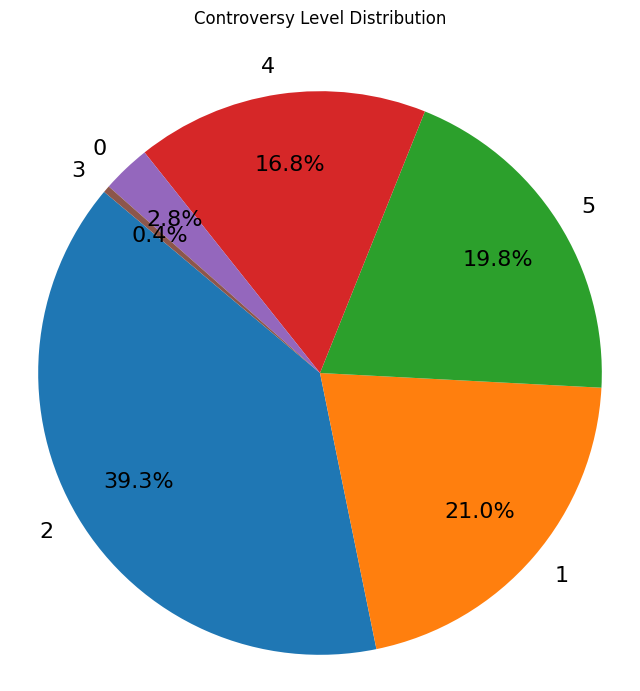

In [ ]:

column_name = 'Controversy Level'  # Mention your column name here
category_counts = data[column_name].value_counts()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16},   pctdistance=0.75, labeldistance=1.1)
plt.title(f'{column_name} Distribution', pad=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

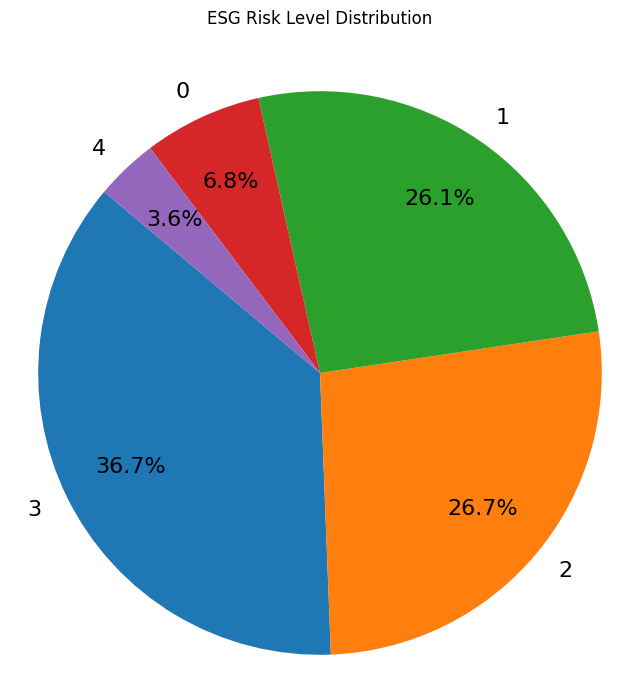

In [ ]:
column_name = 'ESG Risk Level'
category_counts = data[column_name].value_counts()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16},   pctdistance=0.75, labeldistance=1.1)
plt.title(f'{column_name} Distribution', pad=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()